# **PMR3508 - Exercício Programa 02**: <br> **Redes Neurais e o Dataset MNIST**
---
---

## ✏️ **Cabeçalho**:

### **Nome**: `Henrique Abe Fukushima`
### **NUSP**: `13682465`
### **Hash**: `70`

---

## 📜 **Descrição:**

Neste exercício, você irá trabalhar com o **dataset MNIST**, um conjunto de dados com 70.000 imagens de dígitos escritos à mão. Seu objetivo será aplicar os conceitos de **Redes Neurais Artificiais (ANNs)** vistos na aula teórica. Este EP está dividido em tarefas, sua formatação não deve ser alterada, mas novas células de código ou texto podem ser criadas nos blocos de cada tarefa.

---

## ⚠️ **Instruções:**
- Complete todas as tarefas abaixo, respondendo às perguntas e escrevendo o código necessário.
- Comente seu código para facilitar a correção.
- Entregue o notebook no formato `.ipynb`.

---



## ✅ **Tarefas:**

1. **Probabilidades de dígitos no *dataset***       ⇒ `2 pontos`
2. **Análise Exploratória de Dados (EDA)**          ⇒ `2 pontos`
3. **Treinamento e teste de Modelos**               ⇒ `2 pontos`
4. **Comunicação de Resultados e Visualizações**    ⇒ `2 pontos`
5. **Publicação no *Kaggle* e Documentação**        ⇒ `2 pontos`

---

<br>
<center>
        <h1>
        <b>
        BOA SORTE !!!
        </b>
        </h1>
</center>
<br>

---
---

## ⏳ Loading dos Dados

In [1]:
import pickle
import random
import numpy as np
import os
from os.path import join

# Configuração de seeds para replicabilidade
np.random.seed(42)  # Seed para NumPy
random.seed(42)     # Seed para o módulo random

input_path = os.getcwd()  # Obtém o diretório atual
images_filepath = join(input_path, 'MNIST-images.pkl')
labels_filepath = join(input_path, 'MNIST-labels.pkl')
validation_images_filepath = join(input_path, 'MNIST-validation-images.pkl')

with open(images_filepath, 'rb') as f:
    X_tot = pickle.load(f)

with open(labels_filepath, 'rb') as f:
    y_tot = pickle.load(f)

with open(validation_images_filepath, 'rb') as f:
    X_test = pickle.load(f) # Alterei o nome, já que é o conjunto de Teste

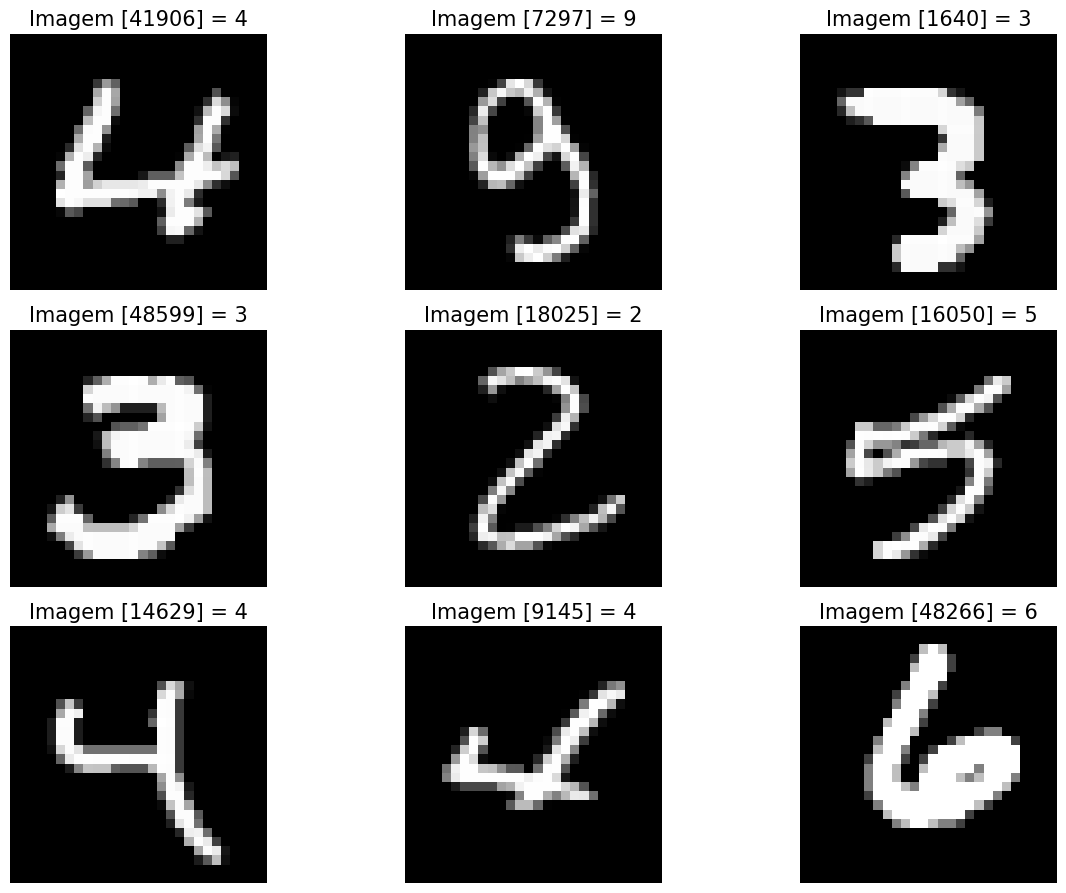

In [2]:
'''
TESTE DE CARREGAMENTO DO DATASET POR VISUALIZAÇÃO
Este bloco visualiza algumas imagens do dataset MNIST para verificar se o
carregamento foi realizado corretamente.
'''

%matplotlib inline
import random
import matplotlib.pyplot as plt

def show_images(images, title_texts):
    # Função para mostrar as imagens com seus respectivos títulos
    cols = 3  # Número de colunas na visualização
    rows = int(len(images) / cols) + 1  # Calcula o número de linhas
    plt.figure(figsize=(12, 12))  # Define o tamanho da figura
    index = 1
    for x in zip(images, title_texts):  # Itera sobre as imagens e títulos
        image = x[0]
        title_text = x[1]
        plt.subplot(rows, cols, index)  # Adiciona um subplot
        plt.axis('off')  # Desativa os eixos
        plt.imshow(image, cmap=plt.cm.gray)  # Mostra a imagem em escala de cinza
        if (title_text != ''):
            plt.title(title_text, fontsize=15)  # Define o título da imagem
        index += 1
    plt.tight_layout()  # Ajusta o layout para evitar sobreposição de títulos
    plt.show()  # Exibe a figura com as imagens e títulos

images_2_show = []  # Lista para armazenar as imagens a serem mostradas
titles_2_show = []  # Lista para armazenar os títulos das imagens
# Seleciona aleatoriamente 9 imagens de treino
for i in range(0, 9):
    r = random.randint(1, 60000)
    images_2_show.append(X_tot[r])  # Adiciona a imagem selecionada à lista
    titles_2_show.append(f"Imagem [{str(r)}] = {str(y_tot[r])}")  # Adiciona o título correspondente

show_images(images_2_show, titles_2_show)  # Exibe as imagens selecionadas

# 0️⃣ Suas bibliotecas e Constantes

In [77]:
import pandas as pd
import time
import itertools
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, log_loss, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV, train_test_split, learning_curve

# Remover aviso de convergência, pois o número de iterações é limitado
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Constantes
HASH_ID = 70

# 1️⃣ Tarefa 01: Probabilidades 🎲

## 🧑🏻‍💻 Item a)

Descubra o número do Dataset associado ao seu Hash.


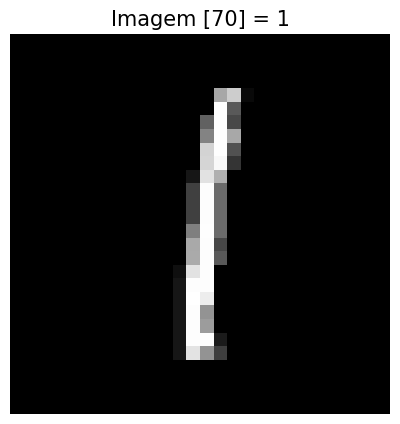

In [78]:
my_num = X_tot[HASH_ID]
my_num_label = y_tot[HASH_ID]
show_images([my_num], [f"Imagem [{HASH_ID}] = {my_num_label}"])

## 🔦 Item b)

Determine, para a imagem vinculada ao seu Hash, qual é a Probabilidade de um píxel claro (128 - 225) para esta única imagem?

A probabilidade de um píxel claro (128-225) é a contagem dos pixels claros ($N_{claros}$) dividido pelo total de pixels $N_T$
$$ P_{claro} = \cfrac{N_{claros}}{N_T} = \cfrac{N_{claros}}{28 \times 28}$$

In [79]:
min_claro = 128
max_claro = 225
N_claros = np.sum((my_num >= min_claro) & (my_num <= max_claro))
print('Número de píxeis claros: ', N_claros)
print(f"Probabilidade de um pixel ser claro: {(N_claros / my_num.size * 100):.2f}%")

Número de píxeis claros:  12
Probabilidade de um pixel ser claro: 1.53%


Verificação do cálculo, por completude:

In [80]:
N_muito_claros = np.sum(my_num > max_claro)
N_escuros = np.sum(my_num < min_claro)
total = N_escuros + N_claros + N_muito_claros
print('Número de píxeis muito claros: ', N_muito_claros)
print('Número de píxeis escuros: ', N_escuros)
print(f'Total: {N_escuros} + {N_claros} + {N_muito_claros} = {total}')

Número de píxeis muito claros:  23
Número de píxeis escuros:  749
Total: 749 + 12 + 23 = 784


Portanto, a probabilidade calculada está correta. Abaixo, está a imagem sem os píxeis claros

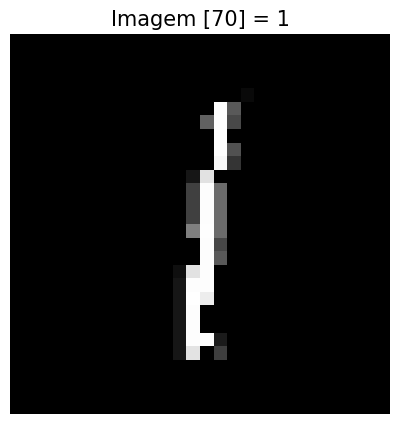

In [81]:
images_no_grey = np.copy(my_num)
images_no_grey[(images_no_grey >= min_claro) & (images_no_grey <= max_claro)] = 0
show_images([images_no_grey], [f"Imagem [{HASH_ID}] = {my_num_label}"])

## ♟️ Item c)

Qual é a probabilidade de um píxel ser claro dentre todos os píxeis que tem a mesma classe que a sua imagem obtida em a)?

In [82]:
# Filtrar todas as imagens com a mesma classe my_num_label
X_my_label = X_tot[y_tot == my_num_label]
print('Número de imagens de classe 1: ', len(X_my_label))

Número de imagens de classe 1:  6725


In [83]:
# Para cada imagem, conta quantos pixels claros existem
N_claros_classe = np.sum((X_my_label >= min_claro) & (X_my_label <= max_claro))
N_total_classe = X_my_label.size
print(f"Número de pixels claros na classe 1: {N_claros_classe}")
print(f"Número total de pixels na classe 1: {N_total_classe}")
print(f"Probabilidade de um pixel ser claro na classe 1: {(N_claros_classe / N_total_classe * 100):.2f}%")

Número de pixels claros na classe 1: 124998
Número total de pixels na classe 1: 5272400
Probabilidade de um pixel ser claro na classe 1: 2.37%


---

# 2️⃣ Tarefa 02: Análise Exploratória de Dados 📊

## ✨ Item a)

Conte quantas vezes cada dígito (de 0 a 9) aparece e responda:

1. Todos os dígitos aparecem a mesma quantidade?

2. Qual o valor médio dos píxeis de cada dígito?

In [84]:
# array com 10 espaços para contagem por classe e média dos píxeis em cada classe
labels_count = np.zeros(10)
X_mean = np.zeros(10)
for i in range(10):
    labels_count[i] = np.sum(y_tot == i)
    X_mean[i] = np.mean(X_tot[y_tot == i])

# guardar em DataFrame
df = pd.DataFrame({'Classe': range(10), 'Contagem': labels_count, 'Valor Médio de Pixel': X_mean}).set_index('Classe')
print(df)

        Contagem  Valor Médio de Pixel
Classe                                
0         5920.0             44.228234
1         6725.0             19.402653
2         6023.0             38.021238
3         6107.0             36.232239
4         5918.0             31.041560
5         5376.0             32.924029
6         5915.0             35.243541
7         6238.0             29.255537
8         5856.0             38.403040
9         5922.0             31.339628


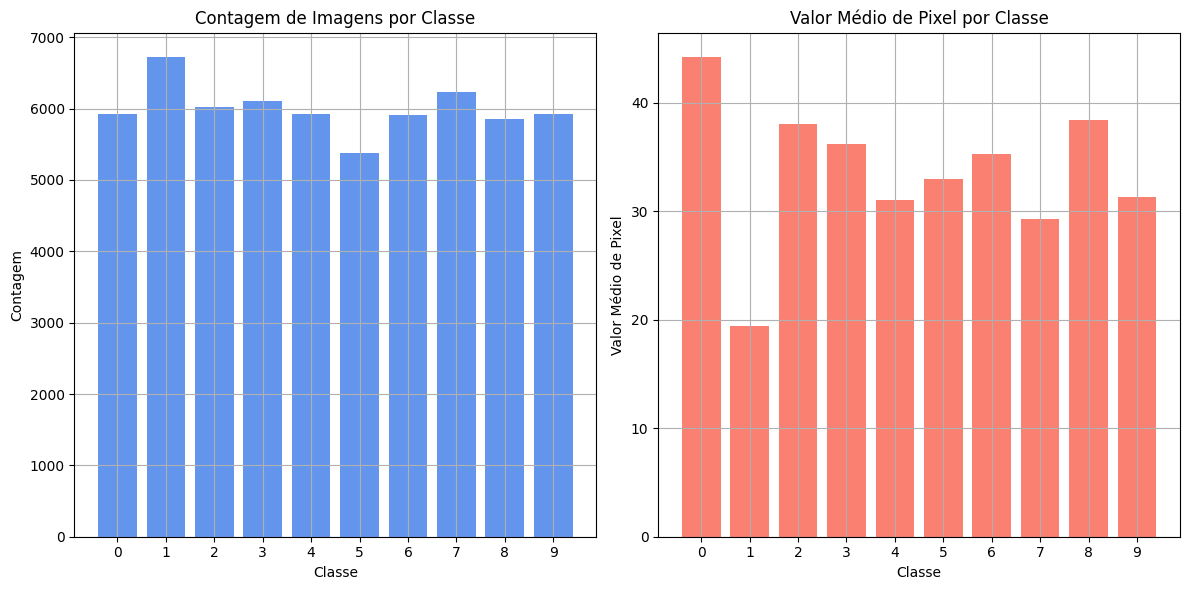

In [85]:
# plot two histograms
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(range(10), labels_count, color='cornflowerblue')
plt.xlabel('Classe')
plt.xticks(range(10))
plt.ylabel('Contagem')
plt.title('Contagem de Imagens por Classe')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.bar(range(10), X_mean, color='salmon')
plt.xlabel('Classe')
plt.xticks(range(10))
plt.ylabel('Valor Médio de Pixel')
plt.title('Valor Médio de Pixel por Classe')
plt.grid(True)

plt.tight_layout()
plt.show()

### Resposta 01: Os dígitos não aparecem em mesma quantidade, porém em quantidade muito próxima, assim podemos dizer este Dataset é balanceado.

### Resposta 02: O valor médio dos píxeis de cada dígito é:
- Classe 0 - 44.228234
- Classe 1 - 19.402653
- Classe 2 - 38.021238
- Classe 3 - 36.232239
- Classe 4 - 31.041560
- Classe 5 - 32.924029
- Classe 6 - 35.243541
- Classe 7 - 29.255537
- Classe 8 - 38.403040
- Classe 9 - 31.339628

O dígito que possui o menor valor médio de pixel é o dígito 1, que corresponde ao dígito do meu HASH. Tal medida é condizente com a baixa probabilidade de se encontrar píxeis claros nessa classe.

## 📏 Item b)

Faça um histograma que mostre a distribuição dos valores dos píxeis para cada dígito. Há muitos valores que são “apagados” (ou seja, com valor 0) ou a distribuição dos valores é mais equilibrada entre os dígitos?


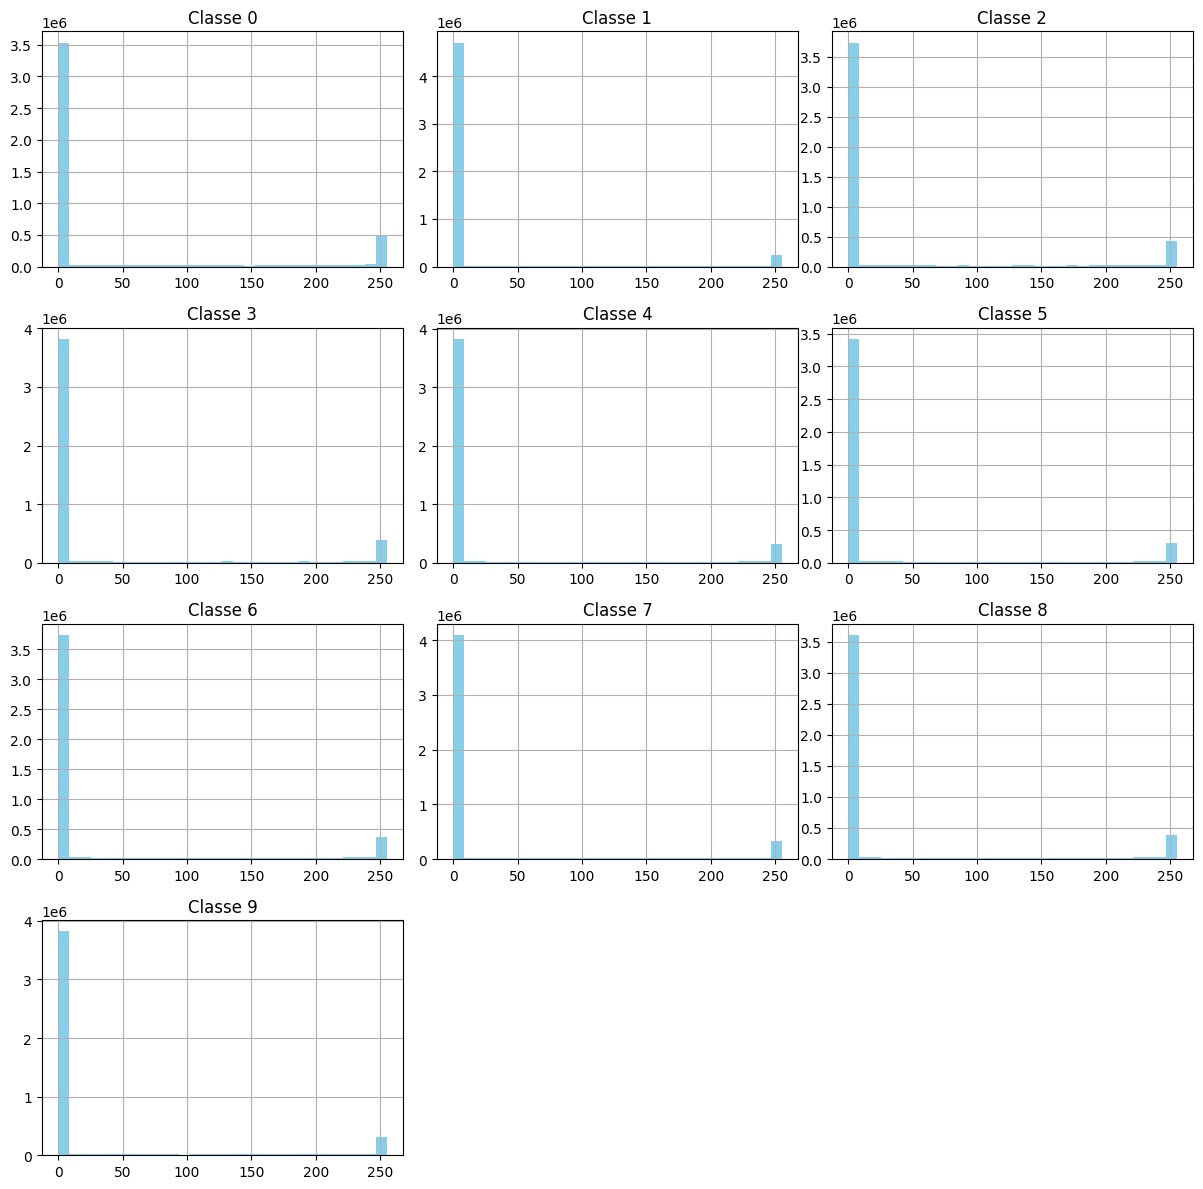

In [86]:
# distribuição dos valores dos pixeis para cada classe
plt.figure(figsize=(12, 12))
for i in range(10):
    plt.subplot(4, 3, i + 1)
    plt.hist(X_tot[y_tot == i].ravel(), bins=30, color='skyblue')
    plt.title(f'Classe {i}')
    plt.grid(True)
plt.tight_layout()
plt.show()

### Resposta: A distribuição dos valores dos píxeis não é equilibrada, há muitos valores "apagados" (com valor 0). Por outro lado, as classes possuem distribuições semelhantes entre si. 

## 🤓 Item c)

Crie uma imagem para cada dígito (de 0 a 9) em que cada píxel dessa nova imagem representa a média do valor dos píxeis para aquela classe. Você consegue reconhecer os dígitos nas imagens criadas?

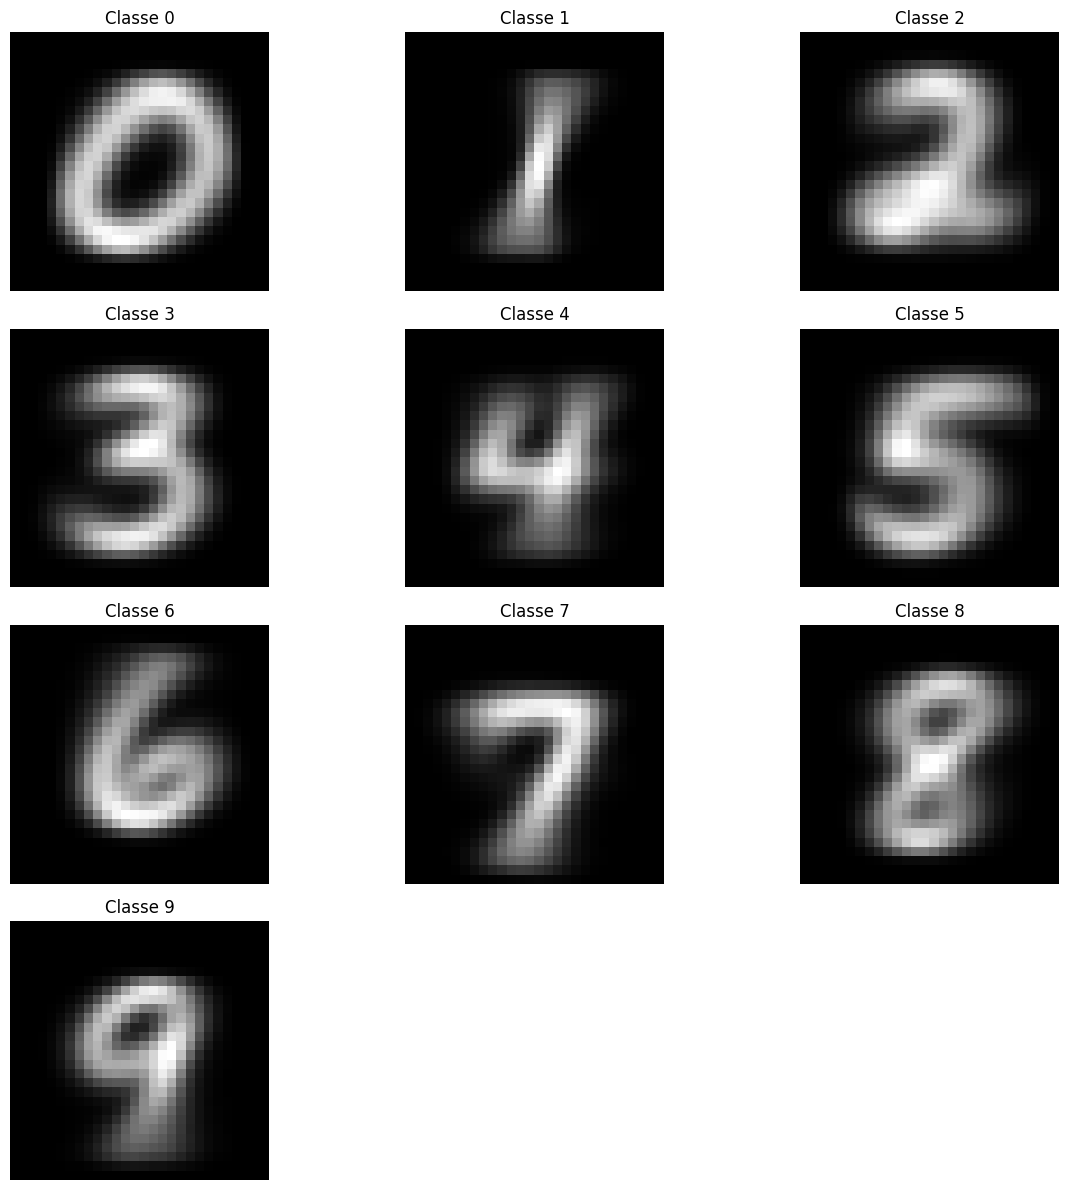

In [87]:
# criar matriz 28 x 28 com a média dos pixeis de cada classe
mean_images = np.zeros((10, 28, 28))

# plot imagens médias
plt.figure(figsize=(12, 12))

for i in range(10):
    mean_images[i] = np.mean(X_tot[y_tot == i], axis=0)

    plt.subplot(4, 3, i + 1)
    plt.imshow(mean_images[i], cmap='gray')
    plt.title(f'Classe {i}')
    plt.axis('off')

plt.tight_layout()
plt.show()

### É possível reconhecer claramente os dígitos de cada imagem. Todos correspondem a uma versão da respectiva classe com "ruído suavizado".

---

# 3️⃣ Tarefa 03: Treinamento e Teste de Modelos 🤖

## 📈 Item a)

Treine a ANN1 com 784 entradas, 8 neurônios na 1⁠ª camada oculta, 8 neurônios na 2⁠ª camada oculta e 10 saídas. Utilize 5 épocas para o treinamento. Use a biblioteca `scikit-learn`:

- Input Layer: 784 entradas (28x28);
- Hidden Layer 1: 8 neurônios;
- Hidden Layer 2: 8 neurônios;
- Output Layer: 10 saídas; (Classificador 0-9)
- Treine com 10 épocas.

In [88]:
X_tot.shape

(60000, 28, 28)

Inicialmente, dividimos nosso dataset em um dataset de treino e outro de teste, para validação dos modelos.

Devemos realizar uma redução de dimensionalidade para que a entrada seja um vetor de tamanho 784. Em seguida, normalizamos os píxeis para garantir a maior estabilidade de convergência.

In [89]:
# Divisão do dataset em treino e validação, redução de dimensionalidade e normalização
X_train, X_val, y_train, y_val = train_test_split(X_tot.reshape(-1, 784)/255, y_tot, test_size=0.2, random_state=42)
X_train.shape, X_val.shape

((48000, 784), (12000, 784))

Para o treino, ao invés de utilizar o número de épocas como parâmetro, vamos deixá-lo fixado em 1 e iterar as épocas e treinar o modelo de forma incremental utilizando a função partial_fit. O warm_state é colocado em True para que o modelo continue sendo treinado de onde parou.

Motivação: pela classe MLPClassifier conseguimos acessar apenas a função de perda (loss function) do set de treino. Queremos as seguintes métricas, para avaliar as curvas de aprendizagem dos modelos:

- Acurácia do Treinamento
- Função de Perda do Treinamento
- Acurácia da Validação
- Função de Perda da Validação

Como função de perda, vamos utilizar a medida de Cross-Entropy calculada pela função log_loss do scikit-learn.

In [90]:
def incremental_train_MLP(hidden_layers, epochs, X_train, y_train, X_val, y_val):

    # Criação do classificador
    mlp = MLPClassifier(
        hidden_layer_sizes=hidden_layers, 
        solver='adam', # Otimizador 
        alpha=1e-4, # Regularização L2
        max_iter=1, # Fixado em 1 para treino incremental
        random_state=42, # Seed para replicabilidade
        warm_start=True # Treino incremental
        )
    
    # Listas para armazenar acurácias e funções de perda
    train_accuracies = []
    val_accuracies = []
    train_losses = []
    val_losses = []

    # Treinamento do classificador
    start_time = time.time()
    for epoch in range(epochs):

        # Treino incremental
        mlp.partial_fit(X_train, y_train, classes=np.unique(y_train))

        # Acurácia e Perda para o Treinamento
        train_preds = mlp.predict(X_train)
        train_probas = mlp.predict_proba(X_train)
        train_accuracy = accuracy_score(y_train, train_preds)
        train_loss = log_loss(y_train, train_probas)

        # Acurácia e Perda para a Validação
        val_preds = mlp.predict(X_val)
        val_probas = mlp.predict_proba(X_val)
        val_accuracy = accuracy_score(y_val, val_preds)
        val_loss = log_loss(y_val, val_probas)

        # Armazena as métricas
        train_accuracies.append(train_accuracy)
        train_losses.append(train_loss)
        val_accuracies.append(val_accuracy)
        val_losses.append(val_loss)

        # Exibe o progresso
        print(f'Época {(epoch + 1):02}/{epochs} | Acurácia (Treino): {train_accuracy*100:.2f}% | Perda (Treino): {train_loss:.4f} | Acurácia (Val): {val_accuracy*100:.2f}% | Perda (Val): {val_loss:.4f}')

    # Fim do treinamento
    end_time = time.time()
    elapsed_time = end_time - start_time
    print()
    print(f'Tempo de treinamento total: {elapsed_time:.2f} segundos')

    # Épocas
    epochs = range(1, epochs + 1)


    # Cria um DataFrame com as métricas
    metrics = pd.DataFrame({
        'epoch': epochs,
        'train_accuracy': train_accuracies,
        'val_accuracy': val_accuracies,
        'train_loss': train_losses,
        'val_loss': val_losses
    })
    
    return mlp, metrics

In [91]:
# Parâmetros ANN1
ann1_hidden = (8, 8)
ann1_epochs = 10

# Treinametno da ANN1
ANN1, ANN1_metrics = incremental_train_MLP(ann1_hidden, ann1_epochs, X_train, y_train, X_val, y_val)

Época 01/10 | Acurácia (Treino): 81.29% | Perda (Treino): 0.6882 | Acurácia (Val): 81.10% | Perda (Val): 0.6918
Época 02/10 | Acurácia (Treino): 86.33% | Perda (Treino): 0.4766 | Acurácia (Val): 85.94% | Perda (Val): 0.4831
Época 03/10 | Acurácia (Treino): 88.22% | Perda (Treino): 0.4116 | Acurácia (Val): 87.93% | Perda (Val): 0.4187
Época 04/10 | Acurácia (Treino): 89.36% | Perda (Treino): 0.3714 | Acurácia (Val): 88.98% | Perda (Val): 0.3810
Época 05/10 | Acurácia (Treino): 90.16% | Perda (Treino): 0.3431 | Acurácia (Val): 89.62% | Perda (Val): 0.3547
Época 06/10 | Acurácia (Treino): 90.81% | Perda (Treino): 0.3213 | Acurácia (Val): 89.99% | Perda (Val): 0.3354
Época 07/10 | Acurácia (Treino): 91.25% | Perda (Treino): 0.3048 | Acurácia (Val): 90.42% | Perda (Val): 0.3210
Época 08/10 | Acurácia (Treino): 91.63% | Perda (Treino): 0.2921 | Acurácia (Val): 90.74% | Perda (Val): 0.3101
Época 09/10 | Acurácia (Treino): 91.98% | Perda (Treino): 0.2816 | Acurácia (Val): 91.09% | Perda (Val):

Mesmo com poucos neurônios e poucas camadas, o modelo já possui uma acurácia de 91.41%. A performance pode aumentar com uma modelagem mais profunda e com mais neurônios.

## 📉 Item b)

Treine a ANN2 com 784 entradas, 256 neurônios na 1⁠ª camada oculta, 256 neurônios na 2⁠ª camada oculta, 256 neurônios na 3ª camada oculta, 256 neurônios na 4ª camada oculta e 10 saídas. Utilize 20 épocas dessa vez. Use a biblioteca `scikit-learn`.

- Input Layer: 784 entradas (28x28);
- Hidden Layer 1: 256 neurônios;
- Hidden Layer 2: 256 neurônios;
- Hidden Layer 3: 256 neurônios;
- Hidden Layer 4: 256 neurônios;
- Output Layer: 10 saídas; (Classificação 0-9)
- Treine com 20 épocas.

In [92]:
# Parâmetros ANN2
ann2_hidden = (256, 256, 256, 256)
ann2_epochs = 20

# Treinamento da ANN2
ANN2, ANN2_metrics = incremental_train_MLP(ann2_hidden, ann2_epochs, X_train, y_train, X_val, y_val)

Época 01/20 | Acurácia (Treino): 96.42% | Perda (Treino): 0.1187 | Acurácia (Val): 95.85% | Perda (Val): 0.1384
Época 02/20 | Acurácia (Treino): 97.78% | Perda (Treino): 0.0716 | Acurácia (Val): 97.10% | Perda (Val): 0.1012
Época 03/20 | Acurácia (Treino): 98.48% | Perda (Treino): 0.0487 | Acurácia (Val): 97.41% | Perda (Val): 0.0898
Época 04/20 | Acurácia (Treino): 98.19% | Perda (Treino): 0.0548 | Acurácia (Val): 96.84% | Perda (Val): 0.1103
Época 05/20 | Acurácia (Treino): 98.96% | Perda (Treino): 0.0342 | Acurácia (Val): 97.39% | Perda (Val): 0.0956
Época 06/20 | Acurácia (Treino): 99.33% | Perda (Treino): 0.0220 | Acurácia (Val): 97.73% | Perda (Val): 0.0818
Época 07/20 | Acurácia (Treino): 99.29% | Perda (Treino): 0.0223 | Acurácia (Val): 97.69% | Perda (Val): 0.0850
Época 08/20 | Acurácia (Treino): 99.08% | Perda (Treino): 0.0285 | Acurácia (Val): 97.31% | Perda (Val): 0.0993
Época 09/20 | Acurácia (Treino): 99.22% | Perda (Treino): 0.0243 | Acurácia (Val): 97.54% | Perda (Val):

A rede mais profunda e com mais neurônios consegue capturar os padrões dos dados com mais eficiência. Mais a frente, vamos verificar se esse modelo não está com overfitting.

## ⚙️ Item c)

Agora você treinará um novo modelo, mais adequado. Para isso, gere ao menos 5 configurações de redes neurais, variando o número de camadas ocultas, o número de neurônios e o número de épocas. As configurações devem estar intermediárias entre `[8, 8]` e `[256, 256, 256, 256]`.

Utilize a função `GridSearchCV` para realizar uma busca exaustiva pelos hiperparâmetros e encontre a configuração que oferece o melhor classificador, justificando sua escolha com base nas métricas de validação.

Como estamos utilizando Cross Validation, podemos utilizar o dataset inteiro X_tot e y_tot. Novamente, fazemos a redução de dimensionalidade.

In [93]:
X_train_tot = X_tot.reshape(-1, 784)/255
y_train_tot = y_tot

Não podemos utilizar tantas combinações de parâmetros, pois o tempo de processamento seria gigantesco. Assim, escolhemos a grade de parâmetros de forma a explorar diferentes arquiteturas. No item (a) exploramos uma rede rasa com poucos neurônios, no item (b) exploramos a rede profunda com muitos neurônios. Agora, vamos explorar as seguintes combinações:

- (8,8,8,8): rede mais profunda, com poucos neurônios
- (256, 256): rede mais rasa, com muitos neurônios
- (256, 128, 64, 32): rede mais profunda, com número de neurônios variado em cada camada

Como o dataset é balanceado, conforme vimos em seções anteriores, a acurácia é uma boa métrica para a comparação dos modelos. Então, vamos selecionar o modelo de maior acurácia.

In [94]:
param_grid = {
    'hidden_layer_sizes': [
        (8, 8, 8, 8), 
        (256, 256), 
        (256, 128, 64, 32),],
        'max_iter': [20, 50]
}

# GridSearchCV com cross-validation de 3 folds
grid_search = GridSearchCV(
    MLPClassifier(random_state=42, verbose=False, solver='adam', alpha=1e-5),
    param_grid, 
    cv=3, 
    verbose=1, 
    n_jobs=-1)

# Execução do GridSearchCV
grid_search_start = time.time()
grid_search.fit(X_train_tot, y_train_tot)
grid_search_end = time.time()
print()
print(f'Tempo de execução do GridSearchCV: {grid_search_end - grid_search_start:.2f} segundos')

# Melhores parâmetros e métricas de avaliação
best_model = grid_search.best_estimator_
print(f"Melhores parâmetros: {grid_search.best_params_}")
print(f"Melhor acurácia: {grid_search.best_score_ * 100:.2f}%")

Fitting 3 folds for each of 6 candidates, totalling 18 fits


/Users/hf/Documents/repositories/PMR3508/venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/hf/Documents/repositories/PMR3508/venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/hf/Documents/repositories/PMR3508/venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/hf/Documents/repositories/PMR3508/venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the 


Tempo de execução do GridSearchCV: 331.88 segundos
Melhores parâmetros: {'hidden_layer_sizes': (256, 128, 64, 32), 'max_iter': 50}
Melhor acurácia: 98.07%


In [95]:
# Parâmetros ANN3
ann3_hidden = (256, 128, 64, 32)
ann3_epochs = 50

# Treinamento da ANN3
ANN3, ANN3_metrics = incremental_train_MLP(ann3_hidden, ann3_epochs, X_train, y_train, X_val, y_val)

Época 01/50 | Acurácia (Treino): 95.21% | Perda (Treino): 0.1662 | Acurácia (Val): 94.74% | Perda (Val): 0.1816
Época 02/50 | Acurácia (Treino): 96.58% | Perda (Treino): 0.1150 | Acurácia (Val): 95.67% | Perda (Val): 0.1416
Época 03/50 | Acurácia (Treino): 97.48% | Perda (Treino): 0.0828 | Acurácia (Val): 96.36% | Perda (Val): 0.1195
Época 04/50 | Acurácia (Treino): 98.39% | Perda (Treino): 0.0541 | Acurácia (Val): 97.08% | Perda (Val): 0.1016
Época 05/50 | Acurácia (Treino): 98.60% | Perda (Treino): 0.0459 | Acurácia (Val): 97.07% | Perda (Val): 0.1024
Época 06/50 | Acurácia (Treino): 98.31% | Perda (Treino): 0.0524 | Acurácia (Val): 96.69% | Perda (Val): 0.1169
Época 07/50 | Acurácia (Treino): 98.32% | Perda (Treino): 0.0507 | Acurácia (Val): 96.96% | Perda (Val): 0.1213
Época 08/50 | Acurácia (Treino): 99.19% | Perda (Treino): 0.0246 | Acurácia (Val): 97.47% | Perda (Val): 0.0981
Época 09/50 | Acurácia (Treino): 99.37% | Perda (Treino): 0.0208 | Acurácia (Val): 97.52% | Perda (Val):

## 🔧 Item d)

Para os modelos treinados nas questões a) e b), além do classificador encontrado na questão c), compare o desempenho dos modelos, analisando se apresentam *underfitting* ou *overfitting*. Justifique com gráficos e análises.

Para verificar se houve *underfitting* ou *overfitting*, podemos analisar as curvas de aprendizagem dos modelos para as respectivas acurácias e loss functions.

O desenvolvimento da função `incremental_train_MLP` permitiu o armazenamento das acurácias e loss functions dos treinamentos dos modelos. Assim basta, plotar os gráfico.

In [96]:
def plot_learning_curves(metrics, title):
    
    # Criação da figura
    plt.figure(figsize=(12, 6))

    # Acurácia
    plt.subplot(1, 2, 1)
    # Line plots
    plt.plot(metrics['epoch'], metrics['train_accuracy'], label='Treino')
    plt.plot(metrics['epoch'], metrics['val_accuracy'], label='Validação')
    # Scatter points
    plt.scatter(metrics['epoch'], metrics['train_accuracy'], color='blue', s=50, label=None)  # Circles for train accuracy
    plt.scatter(metrics['epoch'], metrics['val_accuracy'], color='orange', s=50, label=None)  # Circles for val accuracy
    plt.xlabel('Época')
    plt.ylabel('Acurácia')
    plt.title(f'Acurácia - {title}')
    plt.legend()
    plt.grid(True)

    # Perda
    plt.subplot(1, 2, 2)
    # Line plots
    plt.plot(metrics['epoch'], metrics['train_loss'], label='Treino')
    plt.plot(metrics['epoch'], metrics['val_loss'], label='Validação')
    # Scatter points
    plt.scatter(metrics['epoch'], metrics['train_loss'], color='blue', s=50, label=None)  # Circles for train loss
    plt.scatter(metrics['epoch'], metrics['val_loss'], color='orange', s=50, label=None)  # Circles for val loss
    plt.xlabel('Época')
    plt.ylabel('Loss')
    plt.title(f'Loss - {title}')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Acurácia e Loss finais
    print('Métricas finais:')
    print(f'- Acurácia final (Treino): {metrics["train_accuracy"].iloc[-1]*100:.2f}%')
    print(f'- Acurácia final (Validação): {metrics["val_accuracy"].iloc[-1]*100:.2f}%')
    print(f'- Loss final (Treino): {metrics["train_loss"].iloc[-1]:.4f}')
    print(f'- Loss final (Validação): {metrics["val_loss"].iloc[-1]:.4f}')
    return

### Modelo ANN1

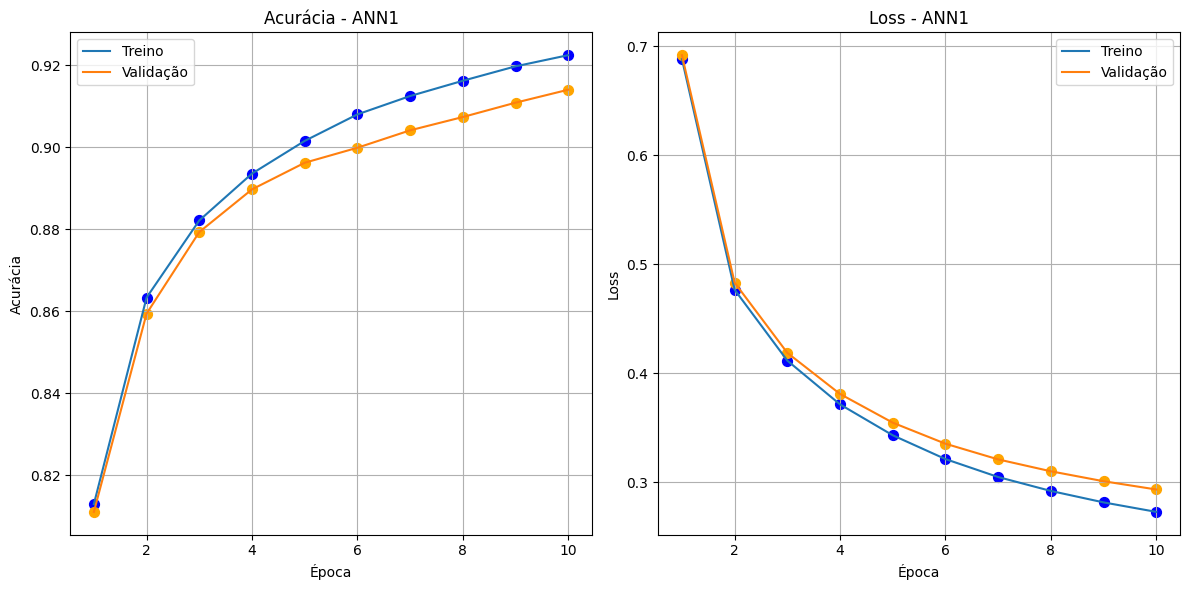

Métricas finais:
- Acurácia final (Treino): 92.25%
- Acurácia final (Validação): 91.41%
- Loss final (Treino): 0.2729
- Loss final (Validação): 0.2934


In [97]:
# Plot das curvas de aprendizado da ANN1
plot_learning_curves(ANN1_metrics, 'ANN1')

A curva de aprendizagem do modelo ANN1 mostra acurácias e funções de perda muito próximas para os conjuntos de treino e validação, o que indica consistência do classificador, porém este modelo apresenta a menor acurácia final dentre os três modelos, o que pode indicar *underfitting*. Isto é, o modelo de poucas camadas e poucos neurônios não é complexo o suficiente para capturar todos os padrões dos dados. 

### Modelo ANN2

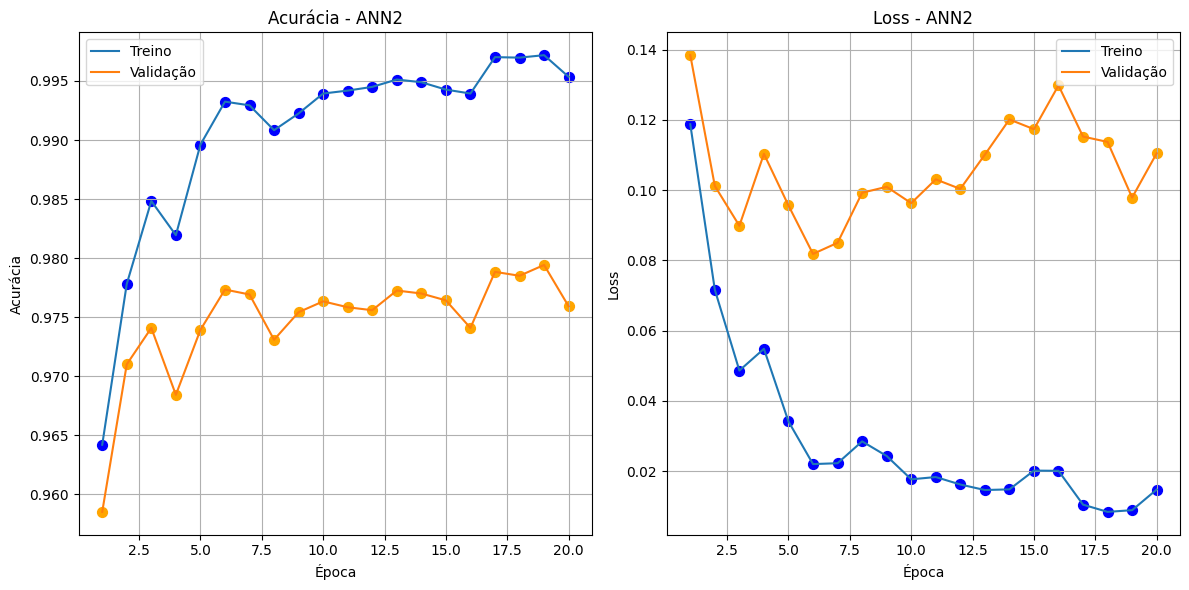

Métricas finais:
- Acurácia final (Treino): 99.54%
- Acurácia final (Validação): 97.59%
- Loss final (Treino): 0.0148
- Loss final (Validação): 0.1105


In [98]:
# Plot das curvas de aprendizado da ANN2
plot_learning_curves(ANN2_metrics, 'ANN2')

O modelo ANN2 tem arquitetura mais profunda e com muito mais neurônios do que a ANN1, isso permite a captura de padrões dos dados mais complexos. Porém, as curvas de aprendizagem apresentam um pequeno grau de *overfitting*, já que entre os conjuntos de treino e validação, a acurácia e loss function diferem de quase 2% e 10%, respectivamente.

### Modelo ANN3

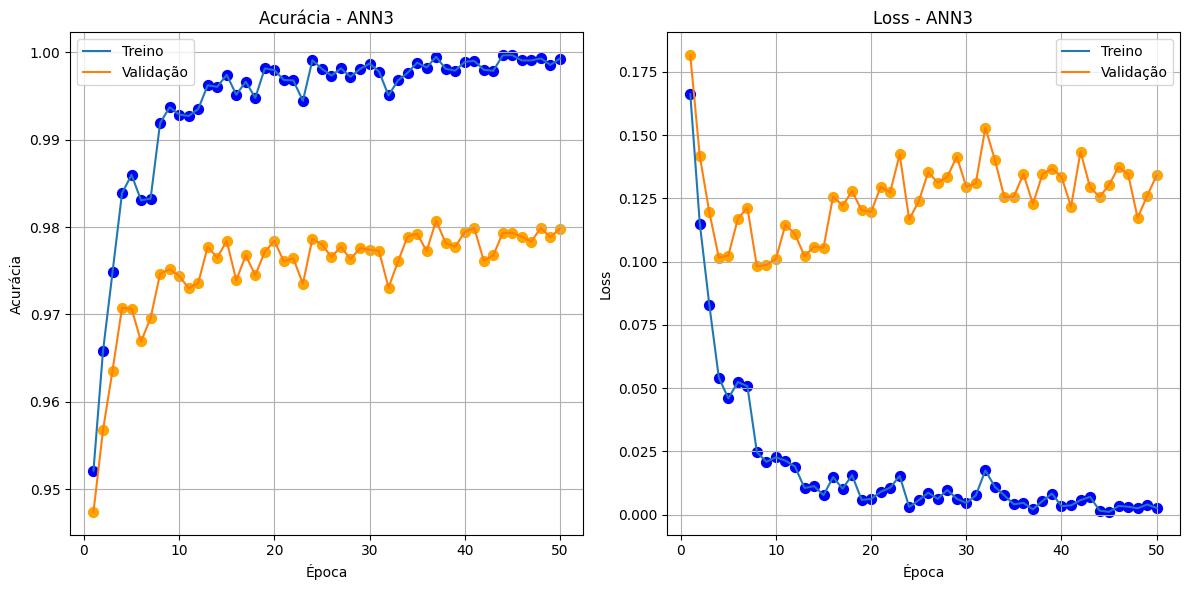

Métricas finais:
- Acurácia final (Treino): 99.93%
- Acurácia final (Validação): 97.98%
- Loss final (Treino): 0.0026
- Loss final (Validação): 0.1340


In [99]:
# Plot das curvas de aprendizado da ANN3
plot_learning_curves(ANN3_metrics, 'ANN3')

Tal como o modelo ANN2, o ANN3 também apresenta *overfitting*, pelos mesmos motivos de diferença entre as curvas de aprendizagem da acurácia e loss function.

---

# 4️⃣ Tarefa 04: Resultados e Visualizações 🤞🏻

## 🐳 Item a)

Gere e apresente uma matriz de confusão que mostre a distribuição das previsões do melhor modelo. Quais as métricas de Acurácia, Precisão, Recall e F1-Score para esse modelo?

### Discussão sobre o melhor modelo

As redes neurais ANN2 e ANN3 tiveram uma performance muito parecida. Ambas possuem quatro camadas escondidas, porém diferem quanto ao número de neurônios e de épocas. A ANN3 é treinada em 50 épocas e possui (256, 128, 64, 32) neurônios, ao passo que a ANN2 tem (256, 256, 256, 256) neurônios e 20 épocas. 

O comportamento da curva de aprendizagem de ambas também é muito semelhante, porém a ANN3 parece ter um comportamento de overfitting levemente maior.

Com isso, optamos pela ANN2 como melhor modelo, por possuir maior robustez devido ao maior número de neurônio e grau de overfitting menor que a ANN3. 

Essa escolha torna-se subjetiva, dadas às diferenças quase que imperceptíveis.

Tomando, o modelo ANN2 como melhor, vamos gerar a Matriz de Confusão e o relatório das métricas para esse modelo.

In [100]:
def plot_confusion_matrix(y_true, y_pred, classes, title='Confusion matrix', cmap=plt.cm.Blues):

    # Cálculo da matriz de confusão
    cm = confusion_matrix(y_true, y_pred)
    
    # Criação da figura
    plt.figure(figsize=(8, 8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    # Normalização da matriz de confusão
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    # Formatação das casas decimais
    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('Rótulo Real')
    plt.xlabel('Rótulo Previsto')
    plt.tight_layout()
    plt.show()
    return

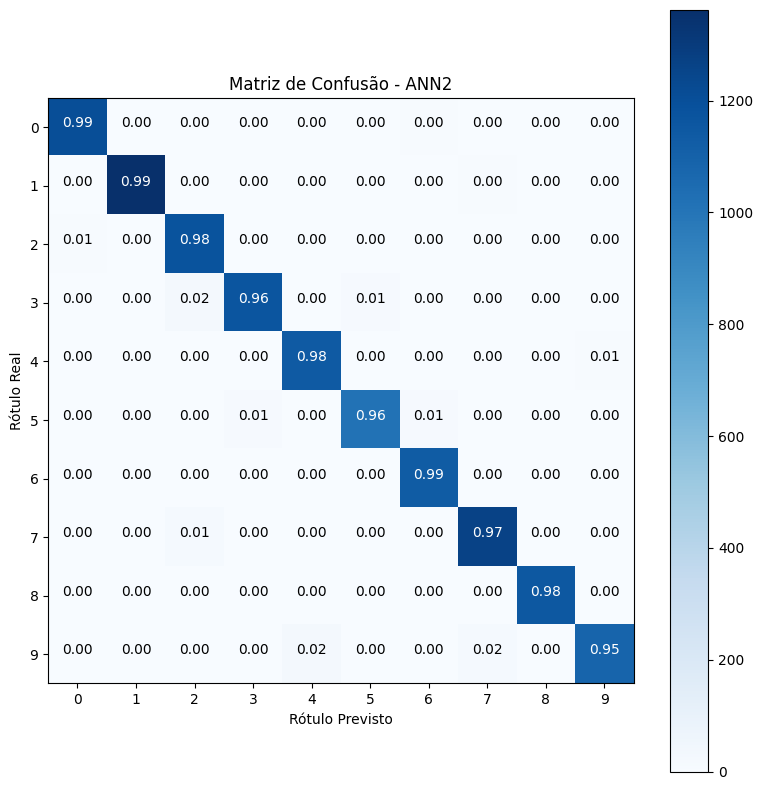

In [101]:
plot_confusion_matrix(y_val, ANN2.predict(X_val), range(10), title='Matriz de Confusão - ANN2')

In [102]:
# Precisão, Recall e F1-Score
print(classification_report(y_val, ANN2.predict(X_val), target_names=[f'Dígito {i}' for i in range(10)]))

              precision    recall  f1-score   support

    Dígito 0       0.98      0.99      0.99      1216
    Dígito 1       0.99      0.99      0.99      1375
    Dígito 2       0.96      0.98      0.97      1209
    Dígito 3       0.98      0.96      0.97      1217
    Dígito 4       0.97      0.98      0.98      1163
    Dígito 5       0.98      0.96      0.97      1052
    Dígito 6       0.97      0.99      0.98      1138
    Dígito 7       0.97      0.97      0.97      1297
    Dígito 8       0.98      0.98      0.98      1182
    Dígito 9       0.99      0.95      0.97      1151

    accuracy                           0.98     12000
   macro avg       0.98      0.98      0.98     12000
weighted avg       0.98      0.98      0.98     12000



## 🐸 Item b)

Exiba gráficos que mostram a evolução da acurácia e da perda (`Loss`) durante o treinamento do melhor modelo encontrado no item 3c).

Já plotamos essas curvas para análises anteriores.

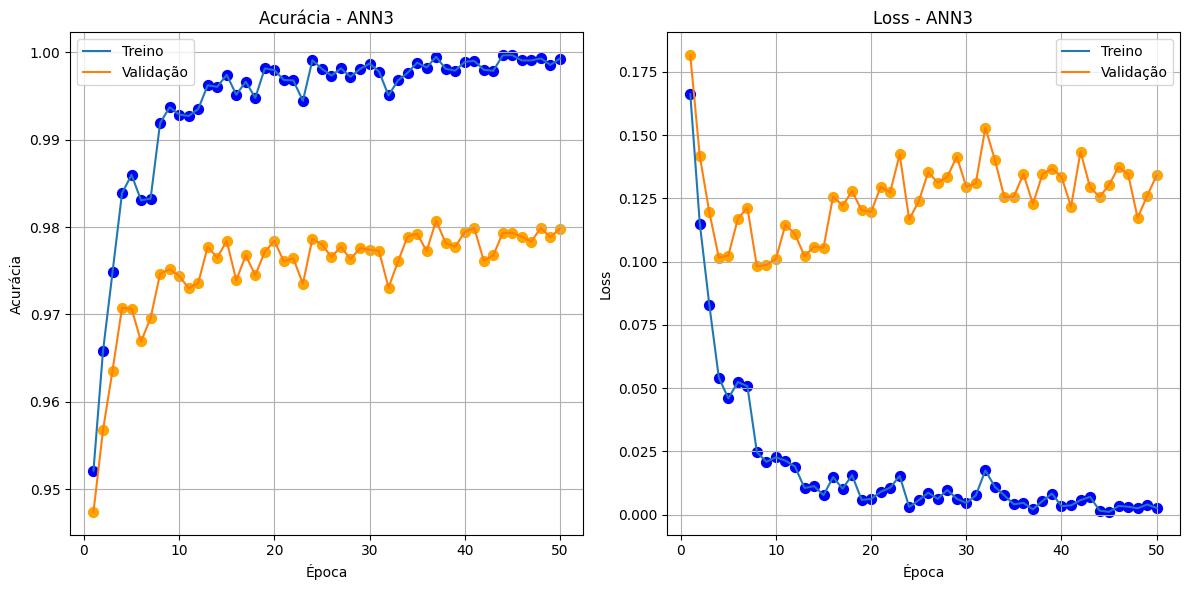

Métricas finais:
- Acurácia final (Treino): 99.93%
- Acurácia final (Validação): 97.98%
- Loss final (Treino): 0.0026
- Loss final (Validação): 0.1340


In [103]:
plot_learning_curves(ANN3_metrics, 'ANN3')

## 🦖 Item c)

Escolha algumas imagens do conjunto de teste e mostre previsões do seu modelo, com acertos e erros. Discuta quais fatores podem ter contribuído para essas previsões corretas e incorretas.

Primeiro vemos quantas imagens temos neste dataset:

In [104]:
X_test.shape

(10000, 28, 28)

Vamos tomar algumas imagens aleatórias e classificá-las com nosso modelo e verificar se este acertou ou errou. Como o enunciado não específica qual o modelo a ser utilizado, vamos considerar o "seu modelo" como sendo o ANN3.

Para reproducibilidade no Kaggle, utilizamos a seed 245 para o random state.

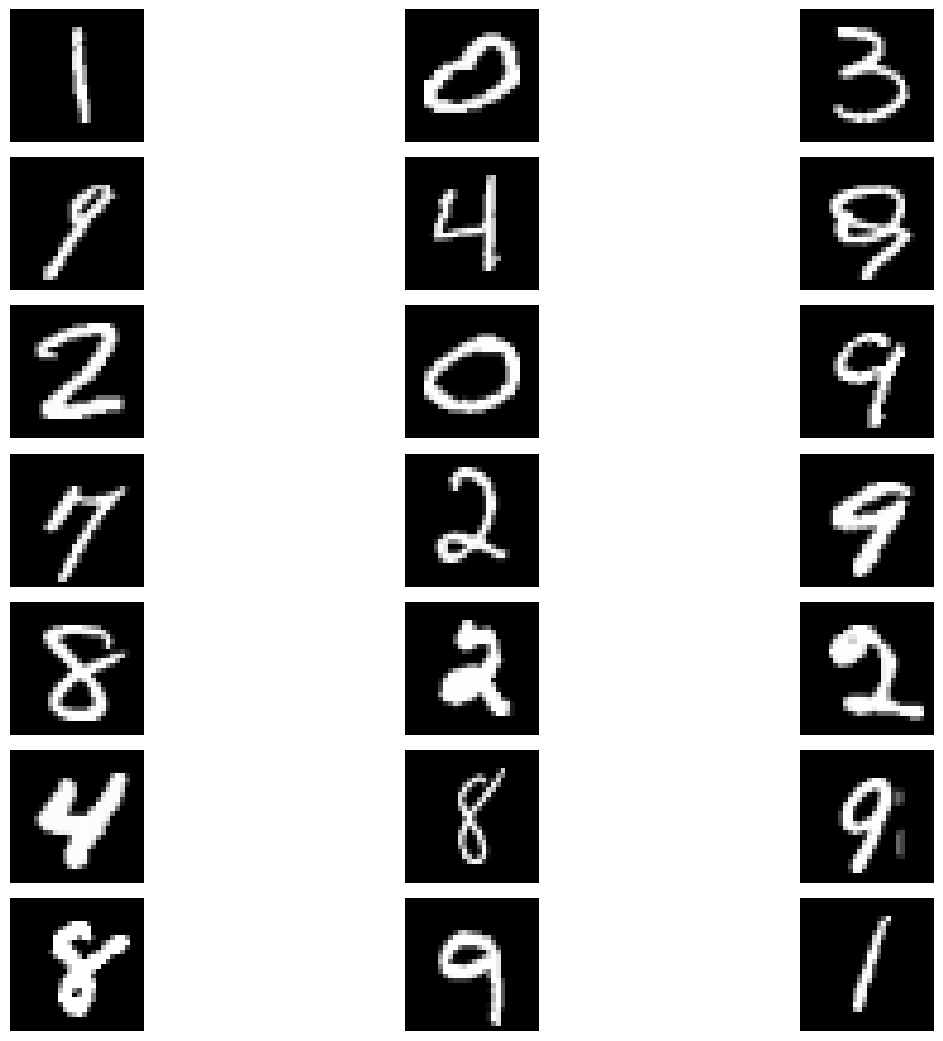

In [105]:
# Escolher um conjunto aleatório de imagens
n = 21
random_state = np.random.RandomState(245)
random_indices = random_state.choice(len(X_test), size=n, replace=False)
random_images = [X_test[i] for i in random_indices]

# Plotar imagens
show_images(random_images, ['' for i in range(n)])

Classificamos a olho as imagens geradas:

In [106]:
random_digits = [1,0,3,9,4,9,2,0,9,7,2,9,8,2,2,4,8,9,8,9,1]

Agora classificamos as imagens utilizando a ANN3

In [107]:
# Predições da ANN3

# Redução de dimensionalidade e normalização
random_images = np.array(random_images).reshape(-1, 784)/255
random_preds = ANN3.predict(random_images)
print(random_preds)

[1 0 3 9 4 9 2 0 9 7 2 9 8 2 2 4 8 9 8 9 1]


Predições da ANN3:
[1 0 3 9 4 9 2 0 9 7 2 9 8 2 2 4 8 9 8 9 1]
Rótulos reais:
[1, 0, 3, 9, 4, 9, 2, 0, 9, 7, 2, 9, 8, 2, 2, 4, 8, 9, 8, 9, 1]


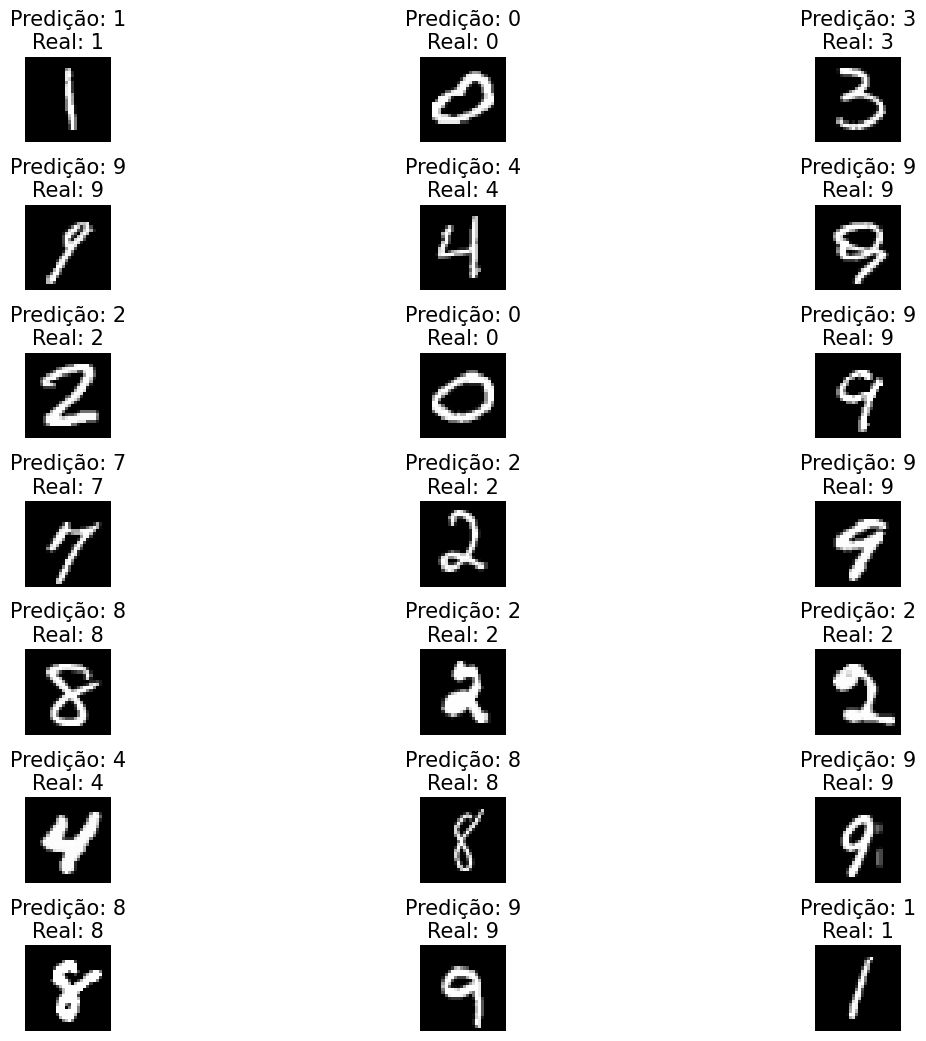

In [108]:
# Comparação entre as predições e os rótulos reais
print('Predições da ANN3:')
print(random_preds)
print('Rótulos reais:')
print(random_digits)

# Plotar imagens com as predições
show_images(random_images.reshape(-1, 28, 28), [f'Predição: {p}\nReal: {r}' for p, r in zip(random_preds, random_digits)])


Para as imagens sorteadas, o modelo ANN3 classificou perfeitamente.

---

# 5️⃣ Tarefa 05: Lembrete *Kaggle* e Documentação 🗃️

## 😮‍💨 Item a)

# Lembre-se de publicar no *Kaggle* com o título correto e padronizado!

## 🙏🏻 Item b)

# Lembre-se de documentar adequadamente seu código e conclusões!